### Portfolio 1

` Detail`
>Student Name - Aditya Sharma

>Student ID- 46199551

> GitHub Repository link -->[Click here](https://github.com/MQCOMP6200/portfolio-s1-2021-iamadisharma)

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import timedelta
plt.style.use('seaborn')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Analysis of Cycling Data

## Loading Data

The first dataset is an export of my ride data from [Strava](https://strava.com/), an online social 
network site for cycling and other sports.  This data is a log of every ride since the start of 2018
and contains summary data like the distance and average speed.  It was exported using 
the script `stravaget.py` which uses the stravalib module to read data. Some details of
the fields exported by that script can be seen in [the documentation for stravalib](https://pythonhosted.org/stravalib/api.html#stravalib.model.Activity). 

The exported data is a CSV file so that's easy to read, however the date information in the file is 
recorded in a different timezone (UTC) so we need to do a bit of conversion.  In reading the data I'm
setting the index of the data frame to be the datetime of the ride. 

If the below cell gives error in `tz_localize`, use `tz_convert` as Pandas is time zone aware. 

In [2]:
strava = pd.read_csv('data/strava_export.csv', index_col='date', parse_dates=True)
strava.index = strava.index.tz_convert('UTC')
new_date=strava.index.astype(str).str.split(" ", n=1)
new_row=[new_date[i][0] for i in range(0,len(new_date))]
strava["Date"]= new_row
strava[["Date"]]
strava.head()

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,Date
date,,,,,,,,,,,
2018-01-02 20:47:51+00:00,100.6,21.0,73.8,False,15.2,94,316.00 m,10,73,Ride,2018-01-02
2018-01-04 01:36:53+00:00,NaN,24.0,131.7,False,18.0,52,236.00 m,5,46,Ride,2018-01-04
2018-01-04 02:56:00+00:00,83.1,25.0,13.8,False,0.0,3,0.00 m,2,2,Ride,2018-01-04
2018-01-04 05:37:04+00:00,110.1,24.0,113.6,False,22.9,77,246.00 m,8,64,Ride,2018-01-04
2018-01-05 19:22:46+00:00,110.9,20.0,147.7,True,58.4,189,676.00 m,12,144,Ride,2018-01-05


The second dataset comes from an application called [GoldenCheetah](https://www.goldencheetah.org/) which provides
some analytics services over ride data.  This has some of the same fields but adds a lot of analysis of the 
power, speed and heart rate data in each ride.  This data overlaps with the Strava data but doesn't include all 
of the same rides. 

Again we create an index using the datetime for each ride, this time combining two columns in the data (date and time) 
and localising to Sydney so that the times match those for the Strava data. 

In [3]:
cheetah = pd.read_csv('data/cheetah.csv', skipinitialspace=True)
cheetah.index = pd.to_datetime(cheetah['date'] + ' ' + cheetah['time'])
cheetah.index = cheetah.index.tz_localize('Australia/Sydney')
cheetah.head()

,date,time,filename,axPower,aPower Relative Intensity,aBikeScore,Skiba aVI,aPower Response Index,aIsoPower,aIF,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-28 06:39:49+11:00,01/28/18,06:39:49,2018_01_28_06_39_49.json,202.211,0.75452,16.6520,1.31920,1.67755,223.621,0.83441,...,0,0,0,0,0,0,0,222.856,0.83155,20.2257
2018-01-28 07:01:32+11:00,01/28/18,07:01:32,2018_01_28_07_01_32.json,226.039,0.84343,80.2669,1.21137,1.54250,246.185,0.91860,...,0,0,0,0,0,0,0,245.365,0.91554,94.5787
2018-02-01 08:13:34+11:00,02/01/18,08:13:34,2018_02_01_08_13_34.json,0.000,0.00000,0.0000,0.00000,0.00000,0.000,0.00000,...,0,0,0,0,0,0,0,0.000,0.00000,0.0000
2018-02-06 08:06:42+11:00,02/06/18,08:06:42,2018_02_06_08_06_42.json,221.672,0.82714,78.8866,1.35775,1.86002,254.409,0.94929,...,0,0,0,0,0,0,0,253.702,0.94665,98.3269
2018-02-07 17:59:05+11:00,02/07/18,17:59:05,2018_02_07_17_59_05.json,218.211,0.81422,159.4590,1.47188,1.74658,233.780,0.87231,...,0,0,0,0,0,0,0,232.644,0.86808,171.0780


The GoldenCheetah data contains many many variables (columns) and we won't go into all of them here. Some
that are of particular interest for the analysis below are:

Here are definitions of some of the more important fields in the data. Capitalised fields come from the GoldenCheetah data
while lowercase_fields come from Strava. There are many cases where fields are duplicated and in this case the values
should be the same, although there is room for variation as the algorithm used to calculate them could be different
in each case. 

  * Duration - overall duration of the ride, should be same as elapsed_time
  * Time Moving - time spent moving (not resting or waiting at lights), should be the same as moving_time
  * Elevation Gain - metres climbed over the ride
  * Average Speed - over the ride
  * Average Power - average power in watts as measured by a power meter, relates to how much effort is being put in to the ride, should be the same as  * average_watts' from Strava
  * Nonzero Average Power - same as Average Power but excludes times when power is zero from the average
  * Average Heart Rate - should be the same as average_heartrate
  * Average Cadence - cadence is the rotations per minute of the pedals
  * Average Temp - temperature in the environment as measured by the bike computer (should be same as average_temp)
  * VAM - average ascent speed - speed up hills
  * Calories (HR) - Calorie expendature as estimated from heart rate data
  * 1 sec Peak Power - this and other  'Peak Power' measures give the maximum power output in the ride over this time period.  Will be higher for shorter periods. High values in short periods would come from a very 'punchy' ride with sprints for example.
  * 1 min Peak Hr - a similar measure relating to Heart Rate
  * NP - Normalised Power, a smoothed average power measurement, generally higher than Average Power 
  * TSS - Training Stress Score, a measure of how hard a ride this was
  * device_watts - True if the power (watts) measures were from a power meter, False if they were estimated
  * distance - distance travelled in Km
  * kudos - likes from other Strava users (social network)
  * workout_type - one of  'Race',  'Workout' or  'Ride'
  
  
Some of the GoldenCheetah parameters are defined [in thier documentation](https://github.com/GoldenCheetah/GoldenCheetah/wiki/UG_Glossary).  

## Question 1. 
    Remove rides with no measured power (where device_watts is False) - these are commutes or MTB rides

In [4]:
result=strava.join(cheetah,on=date,how='inner')  ##inner join because of common values no NaN values.
clean_data=result.drop(result.index[(result.device_watts==False)]) ##Removing the false values
clean_data.head()

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-27 19:39:49+00:00,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride,...,0,0,0,0,0,0,0,222.856,0.83155,20.2257
2018-01-27 20:01:32+00:00,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,Race,...,0,0,0,0,0,0,0,245.365,0.91554,94.5787
2018-02-05 21:06:42+00:00,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride,...,0,0,0,0,0,0,0,253.702,0.94665,98.3269
2018-02-07 06:59:05+00:00,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride,...,0,0,0,0,0,0,0,232.644,0.86808,171.0780
2018-02-09 19:18:03+00:00,123.0,20.0,145.9,True,59.8,193,656.00 m,22,139,Ride,...,0,0,0,0,0,0,0,212.726,0.79375,147.7970


### Method
This method is to join using 
```python

   DF1= cheetah.join(strava)
    Print(DF1)
```
    

In [5]:
new_date=clean_data.index.astype(str).str.split(" ", n=1)
new_row=[new_date[i][0] for i in range(0,len(new_date))]
New_Data=clean_data[["Date"]+["distance"]+["moving_time"]+["average_heartrate"]+["device_watts"]+["NP"]+["elevation_gain"]+["TSS"]+['workout_type']]
New_Data.shape

(209, 9)

# Question 2.
* Look at the distributions of some key variables: time, distance, average speed, average power, TSS. Are they normally distributed? Skewed? 

In [6]:
data=clean_data[["distance"]+["moving_time"]+["Average Speed"]+["Average Power"]+["Date"]+["average_heartrate"]+["TSS"]+['workout_type']]
data=data.set_index('Date')
data.head(5)

,distance,moving_time,Average Speed,Average Power,average_heartrate,TSS,workout_type
Date,,,,,,,
2018-01-27,7.6,17,26.0234,153.283,120.6,20.2257,Ride
2018-01-27,38.6,67,34.4380,186.599,146.9,94.5787,Race
2018-02-05,24.3,65,22.2417,163.264,119.3,98.3269,Ride
2018-02-07,47.1,134,20.7841,148.253,124.8,171.0780,Ride
2018-02-09,59.8,139,25.6585,143.918,123.0,147.7970,Ride


1. Creted a new table so it will be easier to `observe`, `predict` and `compare` between the values provided.
2.`Device watts = false` is terminated as per the task.

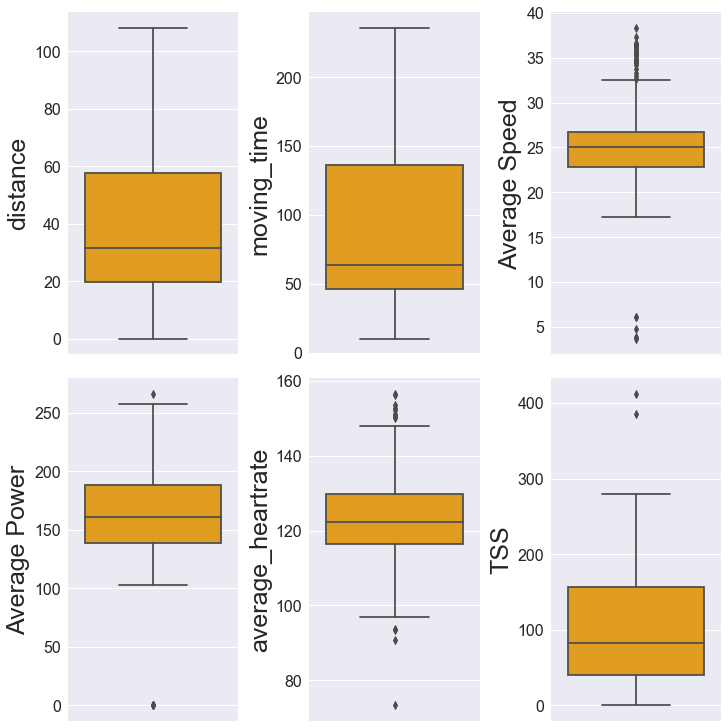

In [7]:
parameters = ["distance","moving_time","Average Speed","Average Power","average_heartrate","TSS",'workout_type']
fig,axes = plt.subplots(2, 3, sharex=False, sharey=False,figsize = (10,10),constrained_layout=True)
for i, ax in enumerate(axes.flat):
    sns.boxplot(y=parameters[i],data=data, orient='H',color='orange',ax=ax)
    ax.xaxis.label.set_size(25)
    ax.yaxis.label.set_size(25)
    ax.tick_params(labelsize=16)

In [8]:
def skewness(x):
    res = 0
    m = x.mean()
    s = x.std()
    for i in x:
        res  += (i-m) * (i-m) * (i-m)
    res /= (len(x) * s * s * s)
    return res

In [9]:
def pearson(x):
    return 3* (x.mean() - x.median()) * x.std()

From the above box plots we can see the Skewness of the variables 
  * TSS is right skewed 
  * Moving Time is Right skewed
  * Distance is right skewed 

For the rest of the variables its hard to say as the are normally distributed on both the sides.

Also Outliers can be Observed in some of the variable boxplots.

skewness= 0.5124316095249656
Pearson's coefficient  = 210.51715157879573


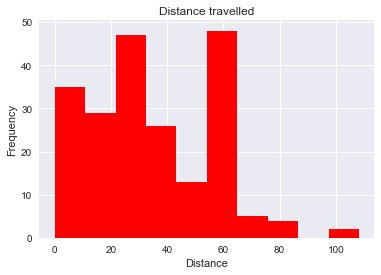

In [10]:
data1=data["distance"]
data1.hist(color= 'red')  
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.title("Distance travelled")
print("skewness=",skewness(data1))
print("Pearson's coefficient  =",pearson(data1))

#### observations
 * From the above distance histogram it is can be observed that it is skewed to the right

skewness= -2.414846388035599
Pearson's coefficient  = -530.1108096072002


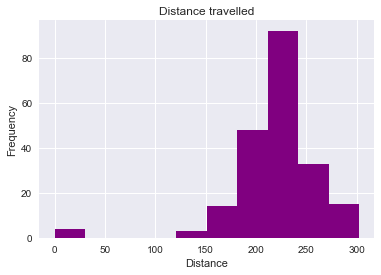

In [11]:
data1=New_Data["NP"]
data1.hist(color= 'purple')  
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.title("Distance travelled")
print("skewness=",skewness(data1))
print("Pearson's coefficient  =",pearson(data1))

#### Observations 
  *By above histogram it is observed that there are more than one peaks which states that it is not `unimoidal` and is `Skewed` to the left.*

Text(0.5, 1.0, 'Combined histogram')

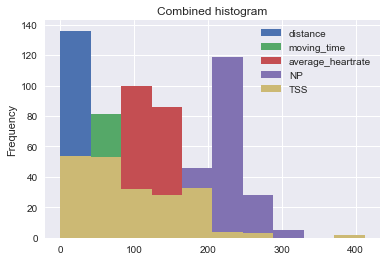

In [12]:
New_Data.plot(kind='hist')
plt.title("Combined histogram")

#### Observations 
  * Above histogram if a combination of multiple variables which suggests that it is Skewed to the `Right` and is not `Unimodal` as there are various peaks in the histogram.

## Question 3
* Explore the relationships between the following variables. Are any of them corrolated with each other (do they vary together in a predictable way)? Can you explain any relationships you observe?  
    * Distance
    * Moving Time
    * Average Speed
    * Heart Rate
    * Power (watts)
    * Normalised power (NP)
    * Training Stress Score
    * Elevation Gain

Text(0.5, 1.0, 'distance vs Average Heartrate')

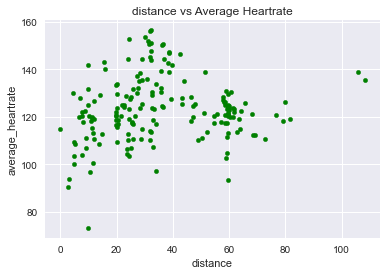

In [13]:
clean_data.plot('distance','average_heartrate', kind='scatter',color='green')
plt.title("distance vs Average Heartrate")

#### Observations
##### Distance vs Average Heartrate
* As the distance of the rider decreses heart rate increases.
* Maximum heart-rate can be observed in the distace between 20 to 40 nearly equals to 30.

Text(0.5, 1.0, 'Time and Distance')

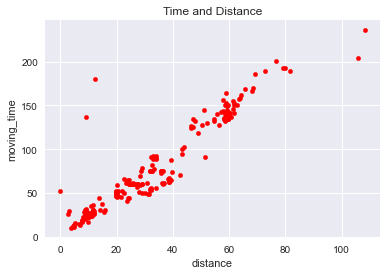

In [14]:
New_Data.plot('distance','moving_time', kind='scatter',color='red')
plt.title("Time and Distance")


  #### 1. From the above scatter plot it is observed that there is a positive relationship between time and distace
 * As distance increases time also `increases` which suggests a `linear` relation between the variables.
 * There are some `outliers` present in the plot.

In [15]:
clean_data[['average_heartrate','average_watts','moving_time']].corr()  #to have correlation between heart rate and watts

,average_heartrate,average_watts,moving_time
average_heartrate,1.000000,0.672457,-0.048611
average_watts,0.672457,1.000000,-0.112507
moving_time,-0.048611,-0.112507,1.000000


## Question 4
* We want to explore the differences between the three categories: `Race`, `Workout` and `Ride`.
    * Use scatter plots with different colours for each category to explore how these categories differ.  
    * Use histograms or box plots to visualise the different distributions of a variable for the three categories.
    * In both cases, experiment with different variables but only include those that are interesting in your final notebook (if none are interesting, show us a representative example).

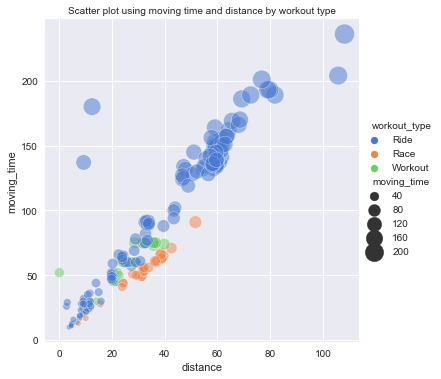

In [16]:
sns.relplot(x="distance", y="moving_time", hue="workout_type", size="moving_time",
            sizes=(30, 400), alpha=.5, palette="muted",
            height=5, data=New_Data)
plt.title("Scatter plot using moving time and distance by workout type",size=10)
plt.show()

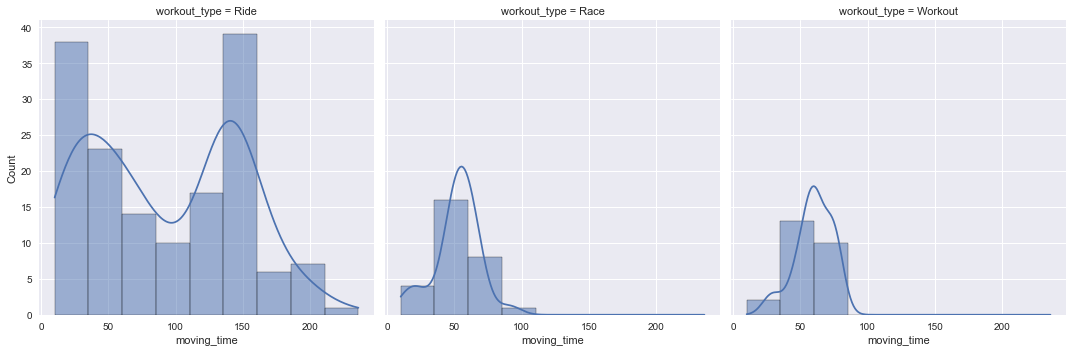

In [17]:
sns.displot(data=New_Data , x='moving_time', col="workout_type", kde=True)

`Observation`

  *  Both The above graphs are between the 3 types of workout and it can be seen that that when compared to moving time Ride has been affected mostly as compared to others and there it can be concluded that most of movement is done in ride and similar amount is there in the race and workout.

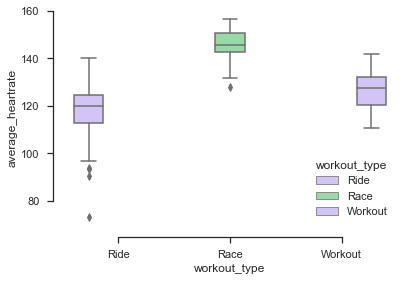

In [18]:
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="workout_type", y="average_heartrate",
            hue="workout_type", palette=["m", "g"],
            data=data)
sns.despine(offset=10, trim=True)

`Observation`

* From the above box plots shows the difference in heartrate in different workouts and the heartrate peaked in race when compared with others and followed by workout but there is not much difference in workout and rides.

## Now We will work on weather datasets.

In [19]:
weather18=pd.read_csv('data/weather_data_2018.csv')
weather19=pd.read_csv('data/weather_data_2019.csv')
#weather18["Date"] = weather18["Year"].astype(str) + '-'+ weather18["Month"].astype(str)+'-'+ weather18["Day"].astype(str)
#weather19["Date"] = weather19["Year"].astype(str) + '-'+ weather19["Month"].astype(str)+'-'+ weather19["Day"].astype(str)
##weather19.drop(['Day', 'Month','Year'], axis=1)


In [20]:
weather_new = pd.concat([weather18,weather19], axis=0)
weather_new['Date'] =  pd.to_datetime((weather_new['Year']*10000+weather_new['Month']*100+weather_new['Day']).apply(str),format='%Y%m%d').dt.strftime('%Y-%m-%d')

## Question 5
* We want to explore relationship between `rides` and `weather`. In order to carry out this analysis, you need `weather` data from relevant source. For your convenience, we have downloaded temperature data from [Bureau of Meterology](http://www.bom.gov.au/). You can find temperature under `Maximum temperature (Degree C)` column which represents maximum temperature for the day. Under the `data` directory, you get `weather_data_2018.csv` and `weather_data_2019.csv` files from where you can read daily temperatures. In order to get temperature for a day so that you can use in your combined dataframe (joining Strava and Cheetah datasets), you need to make `date` column consistent in both dataframes. 
    * Make `date` column consistent across both `weather` and `rides` datasets so that you can get `Maximum temperature` for the day of the ride. 
    * Can you find any relationship between distance travelled per ride and the temperature?
    * Can you find any relatioship between Average speed of ride and the temperature?

In [21]:
combine_temp= pd.merge(weather_new,data,how="inner",on=["Date"])
combine_temp.head()

,Product code,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality,Date,distance,moving_time,Average Speed,Average Power,average_heartrate,TSS,workout_type
0,IDCJAC0010,66212,2018,1,27,30.4,1.0,Y,2018-01-27,7.6,17,26.0234,153.283,120.6,20.2257,Ride
1,IDCJAC0010,66212,2018,1,27,30.4,1.0,Y,2018-01-27,38.6,67,34.4380,186.599,146.9,94.5787,Race
2,IDCJAC0010,66212,2018,2,5,27.4,1.0,Y,2018-02-05,24.3,65,22.2417,163.264,119.3,98.3269,Ride
3,IDCJAC0010,66212,2018,2,7,28.1,1.0,Y,2018-02-07,47.1,134,20.7841,148.253,124.8,171.0780,Ride
4,IDCJAC0010,66212,2018,2,9,31.9,1.0,Y,2018-02-09,59.8,139,25.6585,143.918,123.0,147.7970,Ride


In [22]:
last_df=combine_temp[["distance"]+["moving_time"]+["Maximum temperature (Degree C)"]+["TSS"]+["Average Speed"]+ ['workout_type']]
last_df

,distance,moving_time,Maximum temperature (Degree C),TSS,Average Speed,workout_type
0,7.6,17,30.4,20.2257,26.0234,Ride
1,38.6,67,30.4,94.5787,34.4380,Race
2,24.3,65,27.4,98.3269,22.2417,Ride
3,47.1,134,28.1,171.0780,20.7841,Ride
4,59.8,139,31.9,147.7970,25.6585,Ride
...,...,...,...,...,...,...
204,58.2,136,20.5,159.3630,25.4524,Ride
205,59.6,139,19.0,183.1140,25.5036,Ride
206,19.8,47,20.3,51.1646,24.3316,Ride
207,29.1,50,20.3,83.5620,34.8044,Race


<AxesSubplot:xlabel='Distribution of Temprature', ylabel='Density'>

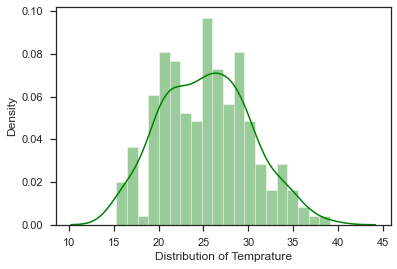

In [23]:
x=last_df["Maximum temperature (Degree C)"]
sns.distplot(x,color="green", axlabel='Distribution of Temprature',bins=20)

In [24]:
last_df.corr()

,distance,moving_time,Maximum temperature (Degree C),TSS,Average Speed
distance,1.000000,0.939383,-0.018843,0.922565,0.187363
moving_time,0.939383,1.000000,0.024996,0.871368,-0.103484
Maximum temperature (Degree C),-0.018843,0.024996,1.000000,-0.027139,-0.119986
TSS,0.922565,0.871368,-0.027139,1.000000,0.134054
Average Speed,0.187363,-0.103484,-0.119986,0.134054,1.000000


<AxesSubplot:xlabel='distance', ylabel='Maximum temperature (Degree C)'>

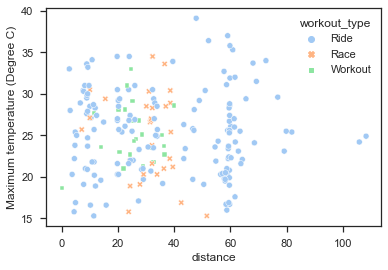

In [25]:
sns.scatterplot(x="distance", y="Maximum temperature (Degree C)", hue="workout_type",style='workout_type',
                     data=last_df)

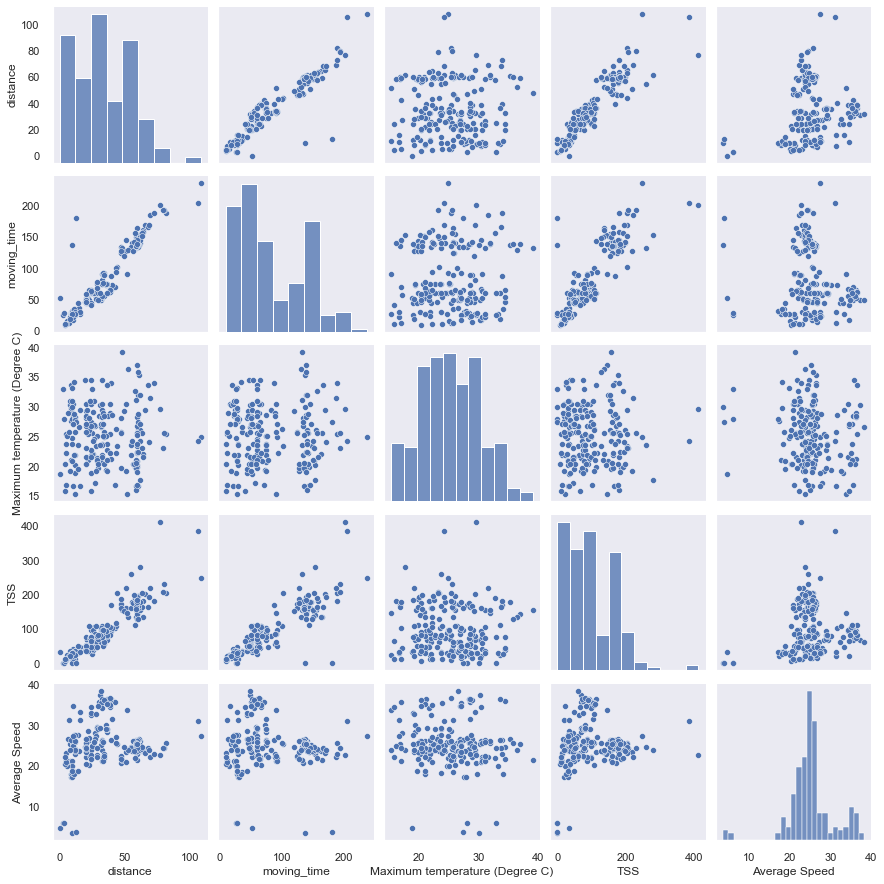

In [26]:
sns.set(style="dark", color_codes=True)
sns.pairplot(last_df, diag_kws=dict(fill=True))
plt.show()

## Observations -Some strong relationship between the variables
   1. Relation between moving time  and distance is strong.
   2. Relation between TSS  and distance is strong.
   3. Relation between moving time and and TSS is strong.

Other than these there is no such strong relationship between other variables 

## Challenge

* What leads to more `kudos`? Is there anything to indicate which rides are more popular? Explore the relationship between the main variables and kudos. Show a plot and comment on any relationship you observe. 

* Generate a plot that summarises the number of km ridden each month over the period of the data. Overlay this with the _sum_ of the Training Stress Score and the _average_ of the Average Speed to generate an overall summary of activity.

* Generate a similar graph but one that shows the activity over a given month, with the sum of the values for each day of the month shown.  So, if there are two rides on a given day, the graph should show the sum of the distances etc for these rides.

Hint: to generate these summary plots you need to use the [timeseries/date functionality](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html) in Pandas to generate a new data frame containing the required data.  


In [27]:
result["elevation_gain"]= result["elevation_gain"].str.split(" ", n = 1, expand = True)

In [28]:
result['elevation_gain'] = result['elevation_gain'].astype('float')
new_ch =  result[['date','kudos','distance','TSS','moving_time','Average Speed','average_heartrate','Average Power',
                                       'Nonzero Average Power','elevation_gain','workout_type']]

In [29]:
new_ch.head()

,date,kudos,distance,TSS,moving_time,Average Speed,average_heartrate,Average Power,Nonzero Average Power,elevation_gain,workout_type
2018-01-27 19:39:49+00:00,01/28/18,4,7.6,20.2257,17,26.0234,120.6,153.283,191.923,95.0,Ride
2018-01-27 20:01:32+00:00,01/28/18,19,38.6,94.5787,67,34.4380,146.9,186.599,231.369,449.0,Race
2018-01-31 21:13:34+00:00,02/01/18,6,26.3,0.0000,113,13.6882,109.8,0.000,0.000,612.0,Ride
2018-02-05 21:06:42+00:00,02/06/18,6,24.3,98.3269,65,22.2417,119.3,163.264,225.094,439.0,Ride
2018-02-07 06:59:05+00:00,02/07/18,10,47.1,171.0780,134,20.7841,124.8,148.253,204.398,890.0,Ride


In [30]:
new_ch.corr()

,kudos,distance,TSS,moving_time,Average Speed,average_heartrate,Average Power,Nonzero Average Power,elevation_gain
kudos,1.000000,0.743757,0.626638,0.646611,0.411414,0.372500,0.218981,0.274502,0.659229
distance,0.743757,1.000000,0.880188,0.919235,0.354813,0.139204,0.283746,0.344451,0.815525
TSS,0.626638,0.880188,1.000000,0.781805,0.340263,0.162631,0.500283,0.580061,0.741208
moving_time,0.646611,0.919235,0.781805,1.000000,0.024566,-0.043981,0.011593,0.087948,0.841487
Average Speed,0.411414,0.354813,0.340263,0.024566,1.000000,0.550812,0.775712,0.722831,0.090723
average_heartrate,0.372500,0.139204,0.162631,-0.043981,0.550812,1.000000,0.468864,0.409745,0.065749
Average Power,0.218981,0.283746,0.500283,0.011593,0.775712,0.468864,1.000000,0.953079,0.015427
Nonzero Average Power,0.274502,0.344451,0.580061,0.087948,0.722831,0.409745,0.953079,1.000000,0.169617
elevation_gain,0.659229,0.815525,0.741208,0.841487,0.090723,0.065749,0.015427,0.169617,1.000000


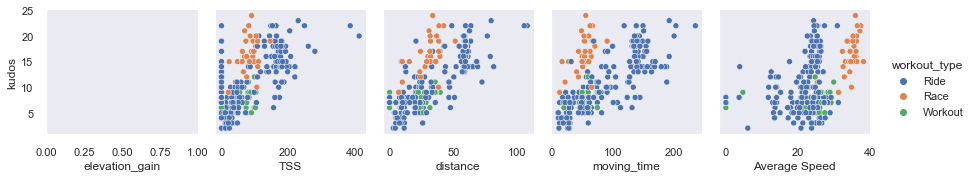

In [31]:
sns.pairplot(new_ch, x_vars=['elevation_gain','TSS','distance','moving_time','Average Speed'],y_vars='kudos' , hue="workout_type")

### Analysis of the variables with the Kudos column

In [32]:
new_ch['date'] = pd.to_datetime(new_ch['date'])
n_df = new_ch.groupby(new_ch['date'].dt.strftime('%B'))['distance'].sum()
new_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
n_df1 = n_df.reindex(new_order, axis=0)

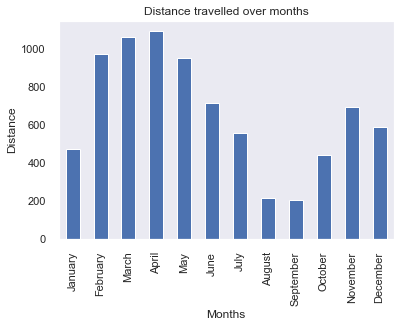

In [33]:
n_df1.plot(kind="bar")
plt.xlabel('Months')
plt.ylabel('Distance')
plt.title('Distance travelled over months')
plt.show()

By the above bar graph it can be seen that most of the distance travelled is in the month of Februry to july then there is a steep decline in the month of august and september and lastly it again rise in the last two months of the year.

### Conclusion 
All the datasets has beem combined and analysis has been done by using various plots and libraries such as Seaborn, matplotlib,Pandasetc and correlation between different variables has been found and performed which shows different trends and some of the variables does not show any relation and treand.So overall Analysis of cobined data has been performed.